In [26]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure


X1 = np.array([
    [52, 55, 61, 66, 70, 61, 64, 73],
    [63, 59, 55, 90, 109, 85, 69, 72],
    [62, 59, 68, 113, 144, 104, 66, 73],
    [63, 58, 71, 122, 154, 106, 70, 69],
    [67, 61, 68, 104, 126, 88, 68, 70],
    [79, 65, 60, 70, 77, 68, 58, 75],
    [85, 71, 64, 59, 55, 61, 65, 83],
    [87, 79, 69, 68, 65, 76, 78, 94]
])

X2 = np.array([
    [19, 17, 2, 1, 1, 2, 2, 1],
    [18, 19, 19, 17, 1, 1, 1, 1],
    [17, 18, 19, 17, 1, 2, 1, 1],
    [18, 19, 19, 19, 19, 1, 1, 2],
    [18, 19, 19, 18, 17, 2, 3, 3],
    [19, 19, 19, 18, 18, 2, 2, 1],
    [19, 19, 18, 18, 17, 1, 2, 1],
    [18, 19, 18, 17, 3, 1, 1, 3]
])

X3 = np.array([
    [1, 97, 98, 1, 1, 2, 2, 1],
    [1, 99, 99, 4, 1, 211, 202, 1],
    [2, 98, 99, 4, 1, 2, 2, 2],
    [1, 99, 99, 3, 3, 1, 98, 99],
    [1, 99, 99, 3, 2, 99, 98, 98],
    [1, 99, 99, 99, 99, 97, 99, 1],
    [2, 99, 98, 97, 99, 2, 1, 1],
    [1, 1, 1, 97, 98, 1, 1, 3]
])

print("Matrix X1:", X1)
print("Matrix X2:", X2)
print("Matrix X3:", X3)

Matrix X1: [[ 52  55  61  66  70  61  64  73]
 [ 63  59  55  90 109  85  69  72]
 [ 62  59  68 113 144 104  66  73]
 [ 63  58  71 122 154 106  70  69]
 [ 67  61  68 104 126  88  68  70]
 [ 79  65  60  70  77  68  58  75]
 [ 85  71  64  59  55  61  65  83]
 [ 87  79  69  68  65  76  78  94]]
Matrix X2: [[19 17  2  1  1  2  2  1]
 [18 19 19 17  1  1  1  1]
 [17 18 19 17  1  2  1  1]
 [18 19 19 19 19  1  1  2]
 [18 19 19 18 17  2  3  3]
 [19 19 19 18 18  2  2  1]
 [19 19 18 18 17  1  2  1]
 [18 19 18 17  3  1  1  3]]
Matrix X3: [[  1  97  98   1   1   2   2   1]
 [  1  99  99   4   1 211 202   1]
 [  2  98  99   4   1   2   2   2]
 [  1  99  99   3   3   1  98  99]
 [  1  99  99   3   2  99  98  98]
 [  1  99  99  99  99  97  99   1]
 [  2  99  98  97  99   2   1   1]
 [  1   1   1  97  98   1   1   3]]


## II.3 Histogram

In [ ]:

# Vẽ histogram của X1 và X2
plt.figure(figsize=(12, 6))

# Histogram cho X1
plt.subplot(1, 2, 1)
plt.hist(X1.ravel(), bins=256, range=(0, 255), color='gray')
plt.title('Histogram của X1')
plt.xlabel('Mức xám')
plt.ylabel('Số lượng pixel')

# Histogram cho X2
plt.subplot(1, 2, 2)
plt.hist(X2.ravel(), bins=256, range=(0, 255), color='gray')
plt.title('Histogram của X2')
plt.xlabel('Mức xám')
plt.ylabel('Số lượng pixel')

plt.tight_layout()
plt.show()

# Cân bằng histogram cho X2
X2_equalized = exposure.equalize_hist(X2)

# Vẽ histogram sau khi cân bằng
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(X2, cmap='gray')
plt.title('Ảnh X2 gốc')

plt.subplot(1, 2, 2)
plt.imshow(X2_equalized, cmap='gray')
plt.title('Ảnh X2 sau khi cân bằng Histogram')

plt.tight_layout()
plt.show()

# Histogram sau khi cân bằng
plt.figure(figsize=(6, 6))
plt.hist(X2_equalized.ravel(), bins=256, range=(0, 1), color='gray')
plt.title('Histogram sau khi cân bằng của X2')
plt.xlabel('Mức xám (Sau khi cân bằng)')
plt.ylabel('Số lượng pixel')
plt.show()


## II.4 Lọc tuyến tính:

### II.4.1. Lọc thông thấp (Low Pass Filter: Smoothing)
mask lọc trung bình  
lọc gaussian

In [ ]:
from scipy.ndimage import convolve

# Mask lọc trung bình
average_filter = np.ones((3, 3)) / 9

# Lọc trung bình
X2_average_filtered = convolve(X2, average_filter)
print("# X2 ban đầu \n", X2)
print("# Lọc trung bình \n", X2_average_filtered)

In [ ]:
plt.subplot(1, 3, 1)
plt.imshow(X2, cmap='gray')
plt.title('Ảnh X2 gốc')

plt.subplot(1, 3, 2)
plt.imshow(X2_average_filtered, cmap='gray')
plt.title('Lọc trung bình trên X2')

from scipy.ndimage import gaussian_filter

# Lọc Gaussian
X2_gaussian_filtered = gaussian_filter(X2, sigma=1)
plt.subplot(1, 3, 3)
plt.imshow(X2_gaussian_filtered, cmap='gray')
plt.title('Lọc Gaussian trên X2')
plt.show()



### II.4.2. Lọc thông cao (High pass filter):
#### Lọc làm sắc nét

In [ ]:
# Mask lọc làm sắc nét (Sharpening filter)
sharpening_filter = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Lọc làm sắc nét
X2_sharpened = convolve(X2, sharpening_filter)

plt.imshow(X2_sharpened, cmap='gray')
plt.title('Lọc làm sắc nét trên X2')
plt.show()

#### Lọc đạo hàm  
sobel

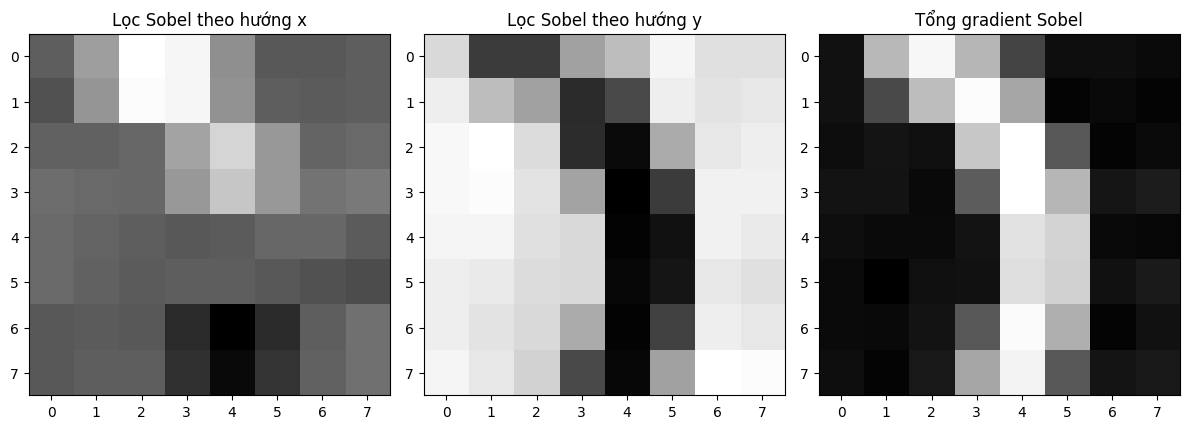

In [28]:
from scipy.ndimage import sobel

# Lọc Sobel theo hướng x
sobel_x = sobel(X2, axis=0)

# Lọc Sobel theo hướng y
sobel_y = sobel(X2, axis=1)

# Tổng gradient của Sobel
sobel_total = np.hypot(sobel_x, sobel_y)

# Hiển thị kết quả
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Lọc Sobel theo hướng x')

plt.subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Lọc Sobel theo hướng y')

plt.subplot(1, 3, 3)
plt.imshow(sobel_total, cmap='gray')
plt.title('Tổng gradient Sobel')

plt.tight_layout()
plt.show()


laplace 

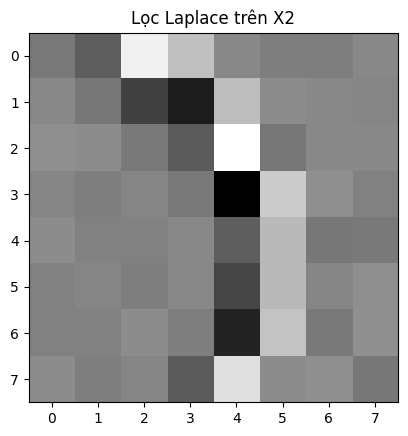

In [29]:
from scipy.ndimage import laplace

# Lọc Laplace
laplace_filtered = laplace(X2)

# Hiển thị kết quả
plt.imshow(laplace_filtered, cmap='gray')
plt.title('Lọc Laplace trên X2')
plt.show()
